# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 2**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
base_path = "../Images/{}"

## Util Functions

In [3]:
def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
def BitQuantizeImage(image,k):
    quant_img=np.copy(image)
    N=2**k
    quant_img=quant_img/256
    quant_img=np.floor(quant_img* N).astype('uint8')
    return quant_img/N

In [5]:
def quantize_images(img):
    quantized_images = []
    for i in range(7, 0, -1):
        new_image = BitQuantizeImage(img, i)
        quantized_images.append(new_image)
    
    return quantized_images

def show_quantized_images(quantized_images, original_image):
    fig, axs = plt.subplots(1,8)

    axs[0].imshow(original_image)
    axs[0].set_title('Original')
    axs[0].axis('off')

    for i in range(7, 0, -1):
        new_image = quantized_images[i-1]
        axs[i].imshow(new_image)
        axs[i].set_title('{} bits'.format(i))
        axs[i].axis('off')
    
    fig.set_size_inches(30, 25)
    plt.show()

## Main Code


> Approach used is to divide (integer division) by a factor N the image, and then multiply by a factor N, where N=2**K and K is the number of bits

In [6]:
img = read_image(base_path.format('quantize.jpg'))
quantized_images = quantize_images(img)

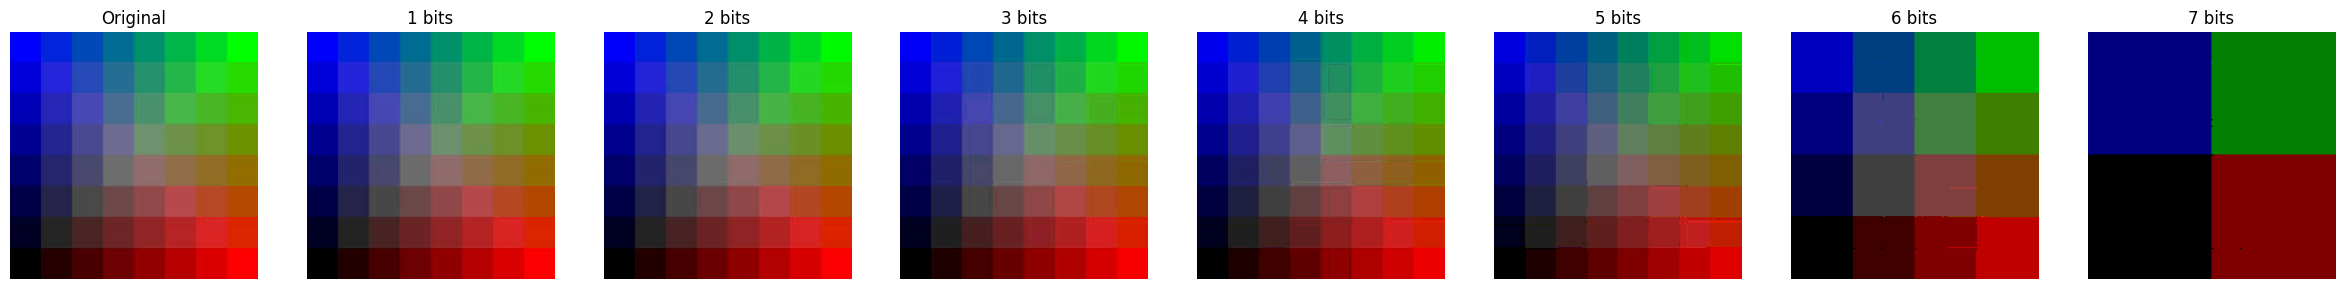

In [7]:
show_quantized_images(quantized_images, img)

In [8]:
img = read_image(base_path.format('atomicbomb.jpg'))
quantized_images = quantize_images(img)

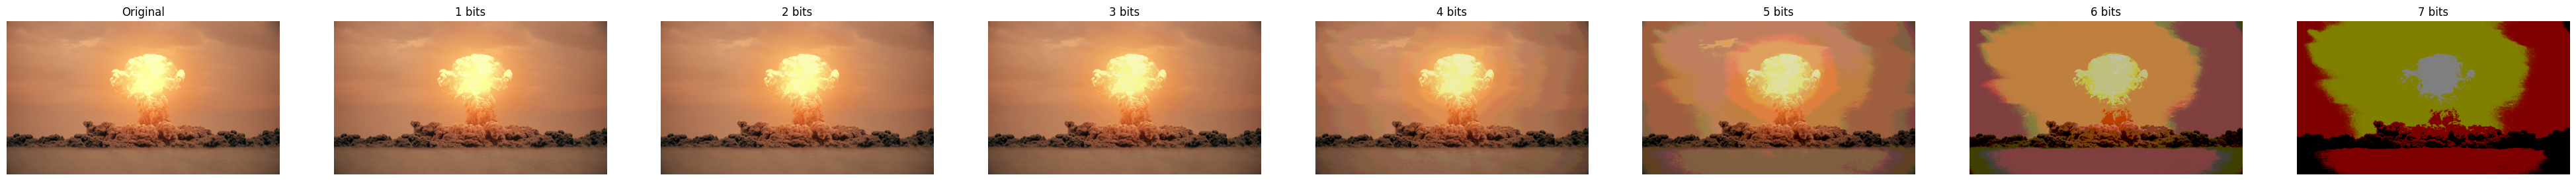

In [9]:
show_quantized_images(quantized_images, img)